Text(0.5, 1.0, 'Resistance vs Temperature')

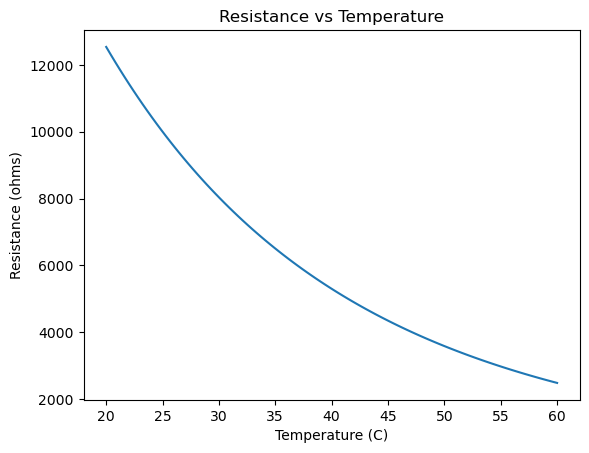

In [1]:
from laser_control.thermistor import THERMISTOR
from laser_control.tec import TEC
import numpy as np
from matplotlib import pyplot as plt
from laser_control.tec_driver import TEC_DRIVER


_thermistor = THERMISTOR(theta_jsm=1, tau=1)
temp = np.linspace(20, 60, 100) + 273.15
res = [_thermistor.calc_resistance(t) for t in temp]
plt.plot(temp-273.15, res)
plt.xlabel('Temperature (C)')
plt.ylabel('Resistance (ohms)')
plt.title('Resistance vs Temperature')

Bode plot


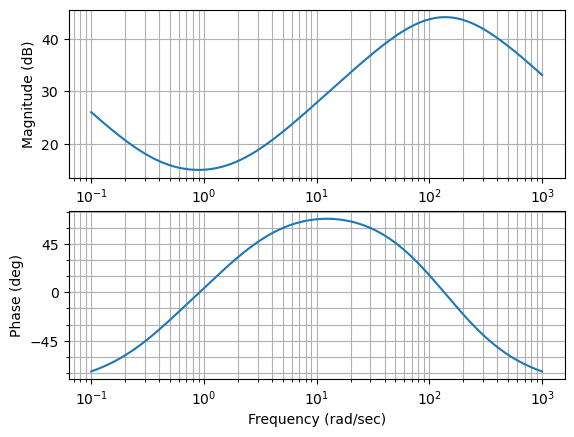

In [2]:

_tec_driver = TEC_DRIVER(thermistor=_thermistor, tec_set_point_temperature=273.15+65)
_tec_driver.plot_bode()


Text(0.5, 1.0, 'Resistance vs Time')

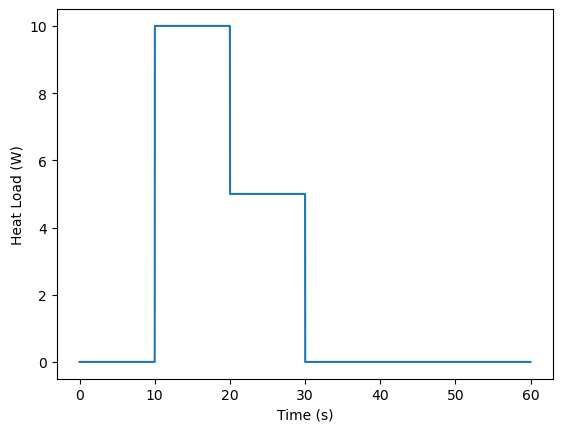

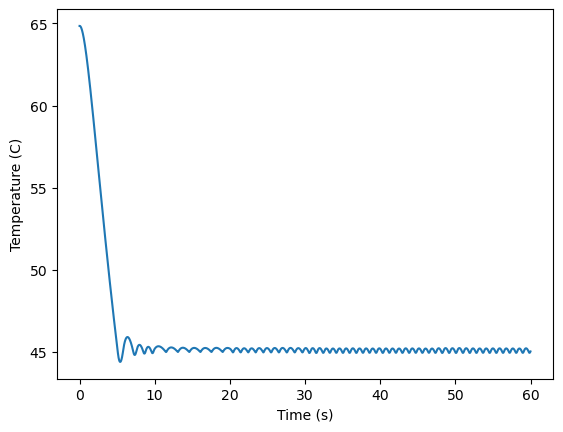

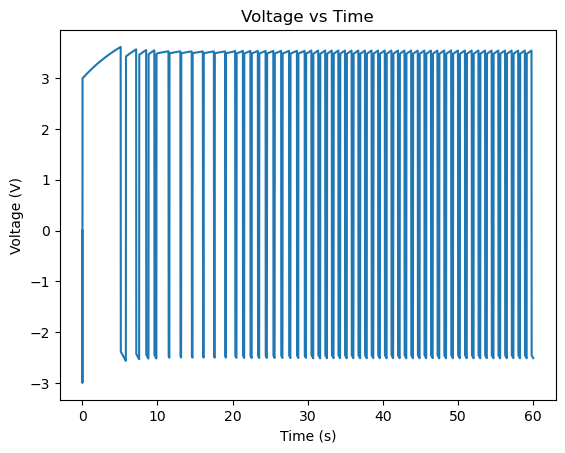

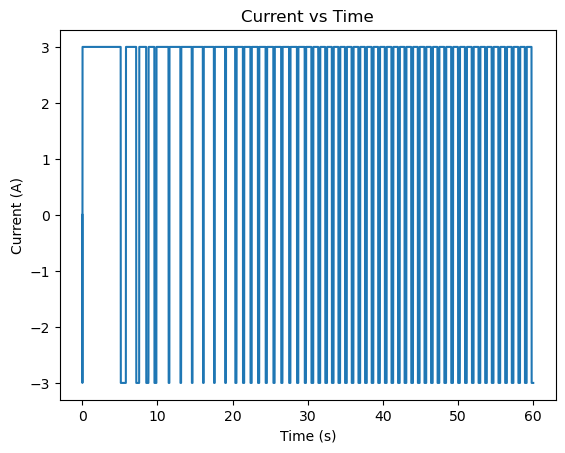

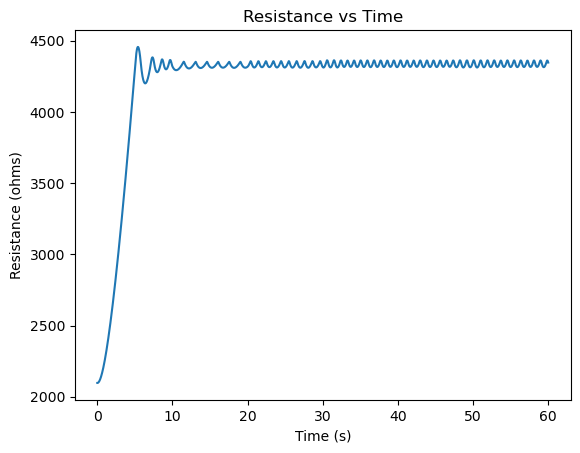

In [8]:
_tec = TEC(Th=273+65, dTmax=70, Qmax=34.6, Imax=7, Umax=8.8, ACR=1.06, time_constant=1)
dt = 1e-2
t = np.arange(0, 60, dt)
n_time_steps = len(t)
q = np.zeros(n_time_steps)
q[t > 10] = 10
q[t > 20] = 5
q[t > 30] = 0
i_tec = np.zeros((n_time_steps, 1))
v_tec = np.zeros((n_time_steps, 1))
t_case = np.zeros((n_time_steps, 1))
r_thermistor = np.zeros((n_time_steps, 1))
tref = 273.15 + 45
_tec_driver._thermistor_resistance_at_set_point = _thermistor.calc_resistance(tref)
for step in range(n_time_steps):
    if step == 0:
        init = True
    else:
        init = False
    _tec.update(qa = q[step], i = i_tec[step, 0], dt=dt, init = init)
    v_tec[step, 0] = _tec.V

    _thermistor.update(Ta = _tec.Ta, dt = dt, init = init)
    t_case[step, 0] = _thermistor._temperature_thermistor
    r_thermistor[step, 0] = _thermistor._resistance
    if step < n_time_steps - 1:
        i_tec[step + 1, 0] = _tec_driver.update(r_thermistor=_thermistor._resistance, dt=dt, init=init)

plt.figure()
plt.plot(t, q)
plt.xlabel('Time (s)')
plt.ylabel('Heat Load (W)')

plt.figure()
plt.plot(t, t_case-273.15)
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')

plt.figure()
plt.plot(t, v_tec)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Time')

plt.figure()
plt.plot(t, i_tec)
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Current vs Time')

plt.figure()
plt.plot(t, r_thermistor)
plt.xlabel('Time (s)')
plt.ylabel('Resistance (ohms)')
plt.title('Resistance vs Time')

